<h1>Text classfication</h1> 

<font color="red"><h2><b>Refrences:</b></h2></font>

https://developers.google.com/machine-learning/guides/text-classification/

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text

<h2>Introduction</h2>

<h2>Step 1: Gather Data</h2>

get data from imdb and thier forms are Word Vectors for Sentiment Analysis.   

<h2>Step 2: Explore Your Data</h2>

In [1]:
import os
import random 
import numpy as np

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname)) as f:
                    train_texts.append(f.read())
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname)) as f:
                    test_texts.append(f.read())
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return ((train_texts, np.array(train_labels)),
            (test_texts, np.array(test_labels)))

In [3]:
data_path = ""
training, testing = load_imdb_sentiment_analysis_dataset(data_path, seed=123)

"""
traiing and testing have two lenght, 
first part is text word of inteviews and
second part is word vector of them


"""

'\ntraiing and testing have two lenght, \nfirst part is text word of inteviews and\nsecond part is word vector of them\n\n\n'

In [4]:
training[0][0]

"POSSIBLE SPOILERS<br /><br />The Spy Who Shagged Me is a muchly overrated and over-hyped sequel. International Man of Mystery came straight out of the blue. It was a lone star that few people had heard of. But it was stunningly original, had sophisticated humour and ample humour, always kept in good taste, and had a brilliant cast. The Spy Who Shagged Me was a lot more commercially advertised and hyped about.<br /><br />OK I'll admit, the first time I saw this film I thought it was very funny, but it's only after watching it two or three times that you see all the flaws. The acting was OK, but Heather Graham cannot act. Her performance didn't seem very convincing and she wasn't near as good as Liz Hurley was in the first one. Those characters who bloomed in the first one, (Scott Evil, Number 2 etc.) are thrown into the background hear and don't get many stand-alone scenes. The film is simply overrun with cameos.<br /><br />In particular, I hated the way they totally disregarded some o

In [4]:
import matplotlib.pyplot as plt

In [56]:
def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.figure(figsize=(12,7))
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()


In [42]:
get_num_words_per_sample(training[0])

174.0

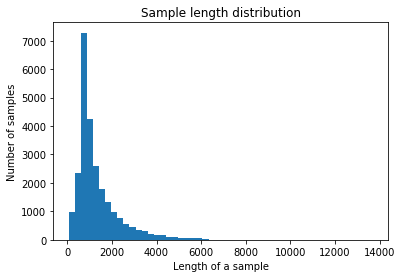

In [46]:
plot_sample_length_distribution(training[0])

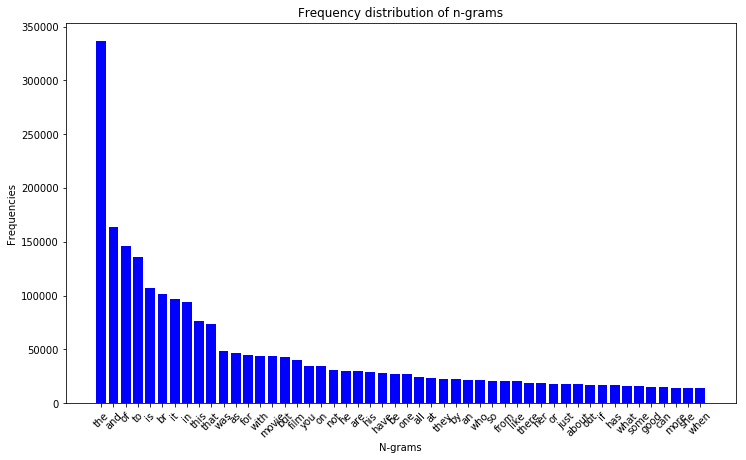

In [57]:
sample_texts = training[0]
plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50)

Once you’ve verified the data, collect the following important metrics that can help characterize your text classification problem:

- <b>Number of samples:</b> Total number of examples you have in the data.
- <b>Number of classes:</b> Total number of topics or categories in the data.
- <b>Number of samples per class:</b> Number of samples per class (topic/category). In a balanced dataset, all classes will have a similar number of samples; in an imbalanced dataset, the number of samples in each class will vary widely.
- <b>Number of words per sample:</b> Median number of words in one sample.
- <b>Frequency distribution of words:</b> Distribution showing the frequency (number of occurrences) of each word in the dataset.
- <b>Distribution of sample length:</b> Distribution showing the number of words per sample in the dataset.

In [59]:
def get_num_classes(labels):
    """Gets the total number of classes.
    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    # Returns
        int, total number of classes.
    # Raises
        ValueError: if any label value in the range(0, num_classes - 1)
            is missing or if number of classes is <= 1.
    """
    num_classes = max(labels) + 1
    missing_classes = [i for i in range(num_classes) if i not in labels]
    if len(missing_classes):
        raise ValueError('Missing samples with label value(s) '
                         '{missing_classes}. Please make sure you have '
                         'at least one sample for every label value '
                         'in the range(0, {max_class})'.format(
                            missing_classes=missing_classes,
                            max_class=num_classes - 1))

    if num_classes <= 1:
        raise ValueError('Invalid number of labels: {num_classes}.'
                         'Please make sure there are at least two classes '
                         'of samples'.format(num_classes=num_classes))
    return num_classes


In [60]:
labels = training[1]
get_num_classes(labels)

2

In [61]:
def plot_class_distribution(labels):
    """Plots the class distribution.
    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    """
    num_classes = get_num_classes(labels)
    count_map = Counter(labels)
    counts = [count_map[i] for i in range(num_classes)]
    idx = np.arange(num_classes)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Class distribution')
    plt.xticks(idx, idx)
    plt.show()

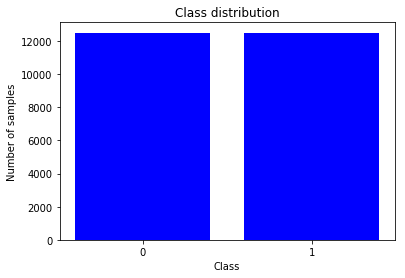

In [63]:
from collections import Counter
plot_class_distribution(labels)

In [64]:
def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.
    # Arguments
        sample_texts: list, sample texts.
    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

In [65]:
get_num_words_per_sample(sample_texts)

174.0

In [ ]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.
    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

<h3>Step 2.5: Choose a Model</h3>

it is important inforamtion about choose model.<br>
I should learn:(
- SVM
- PCA
)

<h2>Step 3: Prepare Your Data</h2>

- A simple best practice to ensure the model is not affected by data order is to always shuffle the data before doing anything else.
- Second, machine learning algorithms take numbers as inputs. This means that we will need to convert the texts into numerical vectors. There are two steps to this process:
1. <b>Tokenization:</b> Divide the texts into words or smaller sub-texts, which will enable good generalization of relationship between the texts and the labels. This determines the “vocabulary” of the dataset (set of unique tokens present in the data).
2. <b>Vectorization:</b> Define a good numerical measure to characterize these texts.

Let’s see how to perform these two steps for both<b> n-gram vectors </b>and<b> sequence vectors</b>,and also using feature selection and normalization techniques to optimize the vector representations
<h3><b><font color="orange"> [Option A]</font> N-gram vectors :</b></h3><br>
<b>[Tokenization]</b><br>
 text is represented as a collection of unique n-grams: groups of n adjacent tokens (typically, words). Consider the text <font color="blue">The mouse ran up the clock</font>. Here,<br> the word <b>unigrams (n = 1)</b> are <font color="blue"> ['the', 'mouse', 'ran', 'up', 'clock']</font>,<br> the word <b>bigrams (n = 2)</b> are <font color="blue"> ['the mouse', 'mouse ran', 'ran up', 'up the', 'the clock']</font>, and so on.
 
<b><font color="orange">NOTE:</font></b>  We have found that tokenizing into word <b>unigrams + bigrams</b> provides good accuracy while taking less compute time.<br>
<b>[Vectorization]</b><br>
- Once we have split our text samples into n-grams, we need to turn these n-grams into numerical vectors that our machine learning models can process.The example below shows the indexes assigned to the unigrams and bigrams generated for two texts.

>Texts: <font color="blue ">'The mouse ran up the clock' and 'The mouse ran down'</font><br>
<font color="black"> Index assigned for every token:</font> <font color="grey ">{'the': 7, 'mouse': 2, 'ran': 4, 'up': 10,
  'clock': 0, 'the mouse': 9, 'mouse ran': 3, 'ran up': 6, 'up the': 11, 'the
clock': 8, 'down': 1, 'ran down': 5}
</font>

- <b>One-hot encoding:</b> Every sample text is represented as a vector indicating the presence or absence of a token in the text.
><font color="blue">'The mouse ran up the clock' =</font><font color="grey ">[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]</font>

- <b>Count encoding:</b>
><font color="blue">'The mouse ran up the clock' =</font><font color="grey ">[1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1]</font>

- <b>Tf-idf encoding:</b> Ferquency words like "the" ,words like “a” will occur very frequently in all texts. So a higher token count for “the” than for other more meaningful words is not very useful.
><font color="blue">'The mouse ran up the clock' =</font><font color="grey ">[0.33, 0, 0.23, 0.23, 0.23, 0, 0.33, 0.47, 0.33,
0.23, 0.33, 0.33]</font>, <a src="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html"><font color="red">(Scikit-learn TdidfTransformer)</font></a>

<b><font color="orange">NOTE:</font></b> We observed that tf-idf encoding is marginally better than the other two in terms of accuracy (on average: 0.25-15% higher), and recommend using this method for vectorizing n-grams
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text

<b><font color="orange">NOTE:</font></b><br>There are many statistical functions that take features and the corresponding labels and output the feature importance score. Two commonly used functions are<b> f_classif</b> and<b> chi2</b>. Our experiments show that both of these functions perform equally well.

<h3>Normalization:</h3><br>
Normalization converts all feature/sample values to small and similar values.

<b>The following code puts together all of the above steps:</b>

1. Tokenize text samples into word uni+bigrams,
2. Vectorize using tf-idf encoding,
3. Select only the top 20,000 features from the vector of tokens by discarding tokens that appear fewer than 2 times and using f_classif to calculate feature importance.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [7]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

In [8]:
def ngram_vectorize(train_texts, train_labels, val_texts):
    """Vectorizes texts as n-gram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of unigrams + bigrams.

    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    return x_train, x_val

In [9]:
train_texts = training[0]
train_labels = training[1]
val_texts = testing[0]
x_train, x_val = ngram_vectorize(train_texts, train_labels, val_texts)

In [15]:
x_train

<25000x20000 sparse matrix of type '<class 'numpy.float32'>'
	with 3485716 stored elements in Compressed Sparse Row format>

<b><font color="orange">NOTE:</font></b><br> With n-gram vector representation, we discard a lot of information about word order and grammar (at best, we can maintain some partial ordering information when n > 1). This is called a bag-of-words approach. This representation is used in conjunction with models that don’t take ordering into account, such as logistic regression, multi-layer perceptrons, gradient boosting machines, support vector machines.

<h3><b><font color="orange">[Option B]</font> Sequence Vectors:</b></h3><br>
word order is critical to the text’s meaning. For example, the sentences, “I used to hate my commute. My new bike changed that completely” can be understood only when read in order. Models such as CNNs/RNNs can infer meaning from the order of words in a sample. For these models, we represent the text as a sequence of tokens, preserving order.

<h3><b>Sequence Vectors :</b></h3><br>
><font color="grey">Texts: <font color="blue">'The mouse ran up the clock' and 'The mouse ran down'</font>
Index assigned for every token:</font><font color="blue"><br> {'clock': 5, 'ran': 3, 'up': 4, 'down': 6, 'the': 1, 'mouse': 2}.</font><font color="gray"><br> 
<font color="orange"><b>NOTE:</b></font> 'the' occurs most frequently, so the index value of 1 is assigned to it.
Some libraries reserve index 0 for unknown tokens, as is the case here.
Sequence of token indexes:</font><br><font color="blue"> 'The mouse ran up the clock' = [1, 2, 3, 4, 1, 5]</font>

There are two options available to vectorize the token sequences:

<font color="black"><b>One-hot encoding: </b></font></br>
<font>Sequences are represented using word vectors in n- dimensional space where n = size of vocabulary.<br>
This representation works great when we are tokenizing as characters, and the vocabulary is therefore small.
</font>
><font color="blue">
'The mouse ran up the clock' = [<br>
  [0, 1, 0, 0, 0, 0, 0],<br>
  [0, 0, 1, 0, 0, 0, 0],<br>
  [0, 0, 0, 1, 0, 0, 0],<br>
  [0, 0, 0, 0, 1, 0, 0],<br>
  [0, 1, 0, 0, 0, 0, 0],<br>
  [0, 0, 0, 0, 0, 1, 0]<br>
]
    </front>

<font color="black"><b>Word embeddings:</b></font>
<font></font><br>
<font>Words have meaning(s) associated with them. <br> we can represent word tokens in a dense vector space (~few hundred real numbers).
    <br>Sequence models often have such an embedding layer as their first layer.<br>This layer learns to turn word index sequences into word embedding vectors during the training process
</font>

<img src='https://developers.google.com/machine-learning/guides/text-classification/images/EmbeddingLayer.png'>

<b>Feature selection:</b>
<font>Not all words in our data contribute to label predictions. We can optimize our learning process by discarding rare or irrelevant words from our vocabulary.<br>
    we observe that using the most frequent 20,000 features is generally sufficient. This holds true for n-gram models as well.
</font><br>
<font>Let’s put all of the above steps in sequence vectorization together. The following code performs these tasks:</font>
1. Tokenizes the texts into words,
2. Creates a vocabulary using the top 20,000 tokens,
3. Converts the tokens into sequence vectors,
4. Pads the sequences to a fixed sequence length.

In [5]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text

In [6]:
# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 500

In [7]:
def sequence_vectorize(train_texts, val_texts):
    """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
    """
    # Create vocabulary with training texts.
    tokenizer = text.Tokenizer(num_words=TOP_K)
    tokenizer.fit_on_texts(train_texts)

    # Vectorize training and validation texts.
    x_train = tokenizer.texts_to_sequences(train_texts)
    x_val = tokenizer.texts_to_sequences(val_texts)

    # Get max sequence length.
    max_length = len(max(x_train, key=len))
    if max_length > MAX_SEQUENCE_LENGTH:
        max_length = MAX_SEQUENCE_LENGTH

    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
    x_train = sequence.pad_sequences(x_train, maxlen=max_length)
    x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    return x_train, x_val, tokenizer.word_index

In [8]:
train_texts = training[0]
train_labels = training[1]
val_texts = testing[0]

x_train, x_val, word_index = sequence_vectorize(train_texts, val_texts)

In [12]:
import pprint
pprint.pprint(x_train)


array([[    0,     0,     0, ...,    28,  2086,  1383],
       [    0,     0,     0, ..., 14360,     2,  1400],
       [    0,     0,     0, ...,     4,  3050,  9654],
       ...,
       [    0,     0,     0, ...,     1,   114,   659],
       [    0,     0,     0, ..., 10083,     2,  6170],
       [  166,    47,     6, ...,   109,  1052,   638]], dtype=int32)


<h2>Step 4: Build, Train, and Evaluate Your Model</h2>

<font>We will use <font color='blue'>TensorFlow</font> with the<font color='blue'> tf.keras</font> API for this.</font><br>
<font>

<b>Constructing the Last Layer:</b><br>

- When we have only 2 classes <b>(binary classification)</b>, our model should output a single probability score. For instance, outputting 0.2 for a given input sample means “20% confidence that this sample is in class 0, 80% that it is in class 1.” To output such a probability score, the activation function of the last layer should be a sigmoid function, and the loss function used to train the model should be binary cross-entropy</font>
<br>
- <font>When there are more than 2 classes <b>(multi-class classification)</b>, our model should output one probability score per class.</font>

<font>The following code defines a function that takes the number of classes as input, and outputs the appropriate number of layer units (1 unit for binary classification; otherwise 1 unit for each class) and the appropriate activation function:</front>

In [10]:
def _get_last_layer_units_and_activation(num_classes):
    """Gets the # units and activation function for the last network layer.

    # Arguments
        num_classes: int, number of classes.

    # Returns
        units, activation values.
    """
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
    return units, activation


In [11]:
num_classes = 2
units, activation = _get_last_layer_units_and_activation(num_classes)

<font color="orange"><b>NOTE:</b></font> <br>
<font>
- When the S/W ratio is small, we’ve found that n-gram models perform better than sequence models. Sequence models are better when there are a large number of small, dense vectors. This is because embedding relationships are learned in dense space, and this happens best over many samples.<br>
    - Sequence models are better when there are a large number of small, dense vectors. ( This is because embedding relationships are learned in dense space, and this happens best over many samples.)


</font>

<font color="orange"><b>[Option A]</b></font><b>  Build n-gram model:</b><br>
<div><font>We refer to models that process the tokens independently (not taking into account word order) as n-gram models. Simple multi-layer perceptrons (including<font color="blue"> logistic regression</font>), <font color="blue">gradient boosting machines</font> and <font color="blue">support vector machines </font>models all fall under this category; they cannot leverage any information about text ordering.</font></div>

<div><font>We compared the performance of some of the n-gram models mentioned above and observed that<font color="black"><b> multi-layer perceptrons (MLPs)</b></font> typically perform better than other options. MLPs are simple to define and understand, provide good accuracy, and require relatively little computation.</font></div>

<div><font>The following code defines a two-layer MLP model in tf.keras, adding a couple of<font color="blue"> Dropout layers for regularization</font> (to prevent <font color="blue">overfitting</font> to training samples).</font></div>

In [ ]:
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout


In [ ]:
def mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    """Creates an instance of a multi-layer perceptron model.

    # Arguments
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of the layers.
        dropout_rate: float, percentage of input to drop at Dropout layers.
        input_shape: tuple, shape of input to the model.
        num_classes: int, number of output classes.

    # Returns
        An MLP model instance.
    """
    op_units, op_activation = _get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))

    for _ in range(layers-1):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=op_units, activation=op_activation))
    return model

In [ ]:
model = mlp_model(layers, units, dropout_rate, input_shape, num_classes)

<font color="orange"><b>[Option B]</b></font><b>  Build sequence model:</b><br>
<div>We refer to models that can learn from the adjacency of tokens as sequence models. This includes CNN and RNN classes of models. Data is pre-processed as sequence vectors for these models.</div>
<div>- The first layer in these models is an embedding layer, which learns the relationship between the words in a dense vector space. </div>
<div>- Words in a given dataset are most likely not unique to that dataset. We can thus learn the relationship between the words in our dataset using other dataset(s).we can transfer an embedding learned from another dataset into our embedding layer. These embeddings are referred to as <b>pre-trained embeddings</b>. Using a pre-trained embedding gives the model a head start in the learning process.</div>


<b>pre-trained embeddings:</b><br>
<div>- There are pre-trained embeddings available that have been trained using large corpora, such as GloVe.<br>
- GloVe has been trained on multiple corpora (primarily Wikipedia).<br><br>
    
    (We tested training our sequence models using a version of GloVe embeddings and observed that if we froze the weights of the pre-trained embeddings and trained just the rest of the network, the models did not perform well. This could be because the context in which the embedding layer was trained might have been different from the context in which we were using it.)
</div>

1. In the first run, with the embedding layer weights frozen, we allow the rest of the network to learn. At the end of this run, the model weights reach a state that is much better than their uninitialized values. For the second run, we allow the embedding layer to also learn, making fine adjustments to all weights in the network. We refer to this process as using a <b>fine-tuned embedding</b>.<br>

-  We found that sepCNNs, a convolutional network variant that is often more data-efficient and compute-efficient, perform better than the other models.<br>

The following code constructs a four-layer sepCNN model:

In [13]:
from tensorflow.python.keras import models
from tensorflow.python.keras import initializers
from tensorflow.python.keras import regularizers

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import SeparableConv1D
from tensorflow.python.keras.layers import MaxPooling1D
from tensorflow.python.keras.layers import GlobalAveragePooling1D


In [ ]:
def sepcnn_model(blocks,
                 filters,
                 kernel_size,
                 embedding_dim,
                 dropout_rate,
                 pool_size,
                 input_shape,
                 num_classes,
                 num_features,
                 use_pretrained_embedding=False,
                 is_embedding_trainable=False,
                 embedding_matrix=None):
    """Creates an instance of a separable CNN model.

    # Arguments
        blocks: int, number of pairs of sepCNN and pooling blocks in the model.
        filters: int, output dimension of the layers.
        kernel_size: int, length of the convolution window.
        embedding_dim: int, dimension of the embedding vectors.
        dropout_rate: float, percentage of input to drop at Dropout layers.
        pool_size: int, factor by which to downscale input at MaxPooling layer.
        input_shape: tuple, shape of input to the model.
        num_classes: int, number of output classes.
        num_features: int, number of words (embedding input dimension).
        use_pretrained_embedding: bool, true if pre-trained embedding is on.
        is_embedding_trainable: bool, true if embedding layer is trainable.
        embedding_matrix: dict, dictionary with embedding coefficients.

    # Returns
        A sepCNN model instance.
    """
    op_units, op_activation = _get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()

    # Add embedding layer. If pre-trained embedding is used add weights to the
    # embeddings layer and set trainable to input is_embedding_trainable flag.
    if use_pretrained_embedding:
        model.add(Embedding(input_dim=num_features,
                            output_dim=embedding_dim,
                            input_length=input_shape[0],
                            weights=[embedding_matrix],
                            trainable=is_embedding_trainable))
    else:
        model.add(Embedding(input_dim=num_features,
                            output_dim=embedding_dim,
                            input_length=input_shape[0]))

    for _ in range(blocks-1):
        model.add(Dropout(rate=dropout_rate))
        model.add(SeparableConv1D(filters=filters,
                                  kernel_size=kernel_size,
                                  activation='relu',
                                  bias_initializer='random_uniform',
                                  depthwise_initializer='random_uniform',
                                  padding='same'))
        model.add(SeparableConv1D(filters=filters,
                                  kernel_size=kernel_size,
                                  activation='relu',
                                  bias_initializer='random_uniform',
                                  depthwise_initializer='random_uniform',
                                  padding='same'))
        model.add(MaxPooling1D(pool_size=pool_size))

    model.add(SeparableConv1D(filters=filters * 2,
                              kernel_size=kernel_size,
                              activation='relu',
                              bias_initializer='random_uniform',
                              depthwise_initializer='random_uniform',
                              padding='same'))
    model.add(SeparableConv1D(filters=filters * 2,
                              kernel_size=kernel_size,
                              activation='relu',
                              bias_initializer='random_uniform',
                              depthwise_initializer='random_uniform',
                              padding='same'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(op_units, activation=op_activation))
    return model

<font color='orange'><b>Train Your Model:</b></font><br>
Now that we have constructed the model architecture, we need to train the model. Training involves :<br>
1. making a prediction based on the current state of the model,<br>
2. calculating how incorrect the prediction is, <br>
3.  updating the weights or parameters of the network to minimize this error.<br>
<br>
<b>hree key parameters to be chosen for these processes:</b>
- <b>Metric:</b> How to measure the performance of our model using a metric. We used accuracy as the metric in our experiments.
- <b>Loss function:</b> A function that is used to calculate a loss value that the training process then attempts to minimize by tuning the network weights. For classification problems, cross-entropy loss works well.
- <b>Optimizer:</b> A function that decides how the network weights will be updated based on the output of the loss function. We used the popular <font color="blue"><a src="https://arxiv.org/abs/1412.6980">Adam</a></font> optimizer in our experiments.<br>
In Keras, we can pass these learning parameters to a model using <b><a src="https://keras.io/getting-started/sequential-model-guide/#compilation"> the compile method.</a></b>

In [ ]:
def train_ngram_model(data,
                      learning_rate=1e-3,
                      epochs=1000,
                      batch_size=128,
                      layers=2,
                      units=64,
                      dropout_rate=0.2):
    """Trains n-gram model on the given dataset.

    # Arguments
        data: tuples of training and test texts and labels.
        learning_rate: float, learning rate for training model.
        epochs: int, number of epochs.
        batch_size: int, number of samples per batch.
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of Dense layers in the model.
        dropout_rate: float: percentage of input to drop at Dropout layers.

    # Raises
        ValueError: If validation data has label values which were not seen
            in the training data.
    """
    # Get the data.
    (train_texts, train_labels), (val_texts, val_labels) = data

    # Verify that validation labels are in the same range as training labels.
    num_classes = explore_data.get_num_classes(train_labels)
    unexpected_labels = [v for v in val_labels if v not in range(num_classes)]
    if len(unexpected_labels):
        raise ValueError('Unexpected label values found in the validation set:'
                         ' {unexpected_labels}. Please make sure that the '
                         'labels in the validation set are in the same range '
                         'as training labels.'.format(
                             unexpected_labels=unexpected_labels))

    # Vectorize texts.
    x_train, x_val = vectorize_data.ngram_vectorize(
        train_texts, train_labels, val_texts)

    # Create model instance.
    model = build_model.mlp_model(layers=layers,
                                  units=units,
                                  dropout_rate=dropout_rate,
                                  input_shape=x_train.shape[1:],
                                  num_classes=num_classes)

    # Compile model with learning parameters.
    if num_classes == 2:
        loss = 'binary_crossentropy'
    else:
        loss = 'sparse_categorical_crossentropy'
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

    # Create callback for early stopping on validation loss. If the loss does
    # not decrease in two consecutive tries, stop training.
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2)]

    # Train and validate model.
    history = model.fit(
            x_train,
            train_labels,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=(x_val, val_labels),
            verbose=2,  # Logs once per epoch.
            batch_size=batch_size)

    # Print results.
    history = history.history
    print('Validation accuracy: {acc}, loss: {loss}'.format(
            acc=history['val_acc'][-1], loss=history['val_loss'][-1]))

    # Save model.
    model.save('IMDb_mlp_model.h5')
    return history['val_acc'][-1], history['val_loss'][-1]

<h2>
Step 5: Tune Hyperparameters</h2>

<div>We had to choose a number of hyperparameters for defining and training the model. We relied on intuition,</div>
<div>Let’s take a look at some of the hyperparameters we used and what it means to tune them:</div>
- <b>Number of layers in the model:</b> <br> oo many layers will allow the model to learn too much information about the training data, causing overfitting. Too few layers can limit the model’s learning ability, causing underfitting.<br>For text classification datasets, we experimented with one, two, and three-layer MLPs.<br>
- <b>Number of units per layer: </b><br>The units in a layer must hold the information for the transformation that a layer performs. <br>For the first layer, this is driven by the number of features.<br> In subsequent layers,Try to minimize the information loss between layers. <br>(We tried unit values in the range [8, 16, 32, 64], and 32/64 units worked well.)<br>
- <b>Dropout rate: </b><br>Dropout layers are used in the model for regularization. They define the fraction of input to drop as a precaution for overfitting. Recommended range: 0.2–0.5.<br>
- <b>Learning rate: </b><br>This is the rate at which the neural network weights change between iterations. A large learning rate may cause large swings in the weights, and we may never find their optimal values. A low learning rate is good, but the model will take more iterations to converge. It is a good idea to start low, say at 1e-4. If the training is very slow, increase this value. If your model is not learning, try decreasing learning rate.<br>
- <b>Kernel size: </b><br>it is specific to our sepCNN mode<br>The size of the convolution window. Recommended values: 3 or 5.
- <b>Embedding dimensions: </b><br>it is specific to our sepCNN mode<br>The number of dimensions we want to use to represent word embeddings—i.e., the size of each word vector. Recommended values: 50–300. In our experiments, we used GloVe embeddings with 200 dimensions with a pre- trained embedding layer.

<h2>
Step 6: Deploy Your Model</h2>

<h2>Conclusion</h2>

<h2>Appendix: Batch Training</h2>